In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [100]:
train = pd.read_csv('train_house_prediction.csv')
test = pd.read_csv('test_house_prediction.csv')

In [101]:
train.shape, test.shape

((1460, 81), (1459, 80))

## Pre Modeling 

In [102]:
train.duplicated().sum()

0

In [103]:
test.duplicated().sum()

0

In [104]:
list(train.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype(

In [105]:
list(test.dtypes)

[dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('

In [106]:
## Changing numerical column to object type.
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

In [107]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Splitting categorical and numerical columns.

In [108]:
## For train data
numerical_train_var=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_train_var=[key for key in dict(train.dtypes) if dict(train.dtypes)[key] in ['object']]

train_cat = train[cat_train_var]

train_num = train[numerical_train_var]

In [109]:
del train_num['Id']

In [110]:
train_y = train_num['SalePrice']
del train_num['SalePrice']

In [111]:
train_y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [112]:
## For test data
numerical_test_var=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_test_var=[key for key in dict(test.dtypes) if dict(test.dtypes)[key] in ['object']]

test_cat = test[cat_test_var]

test_num = test[numerical_test_var]

In [113]:
id = test['Id']
del test_num['Id']

### Missing value imputation for numerical column.

In [114]:
def missings_treat_num(x):
    x = x.fillna(x.mean())
    return x


In [115]:
train_num = train_num.apply(lambda x: missings_treat_num(x))

In [116]:
train_num['GarageYrBlt'] = train_num['GarageYrBlt'].astype(int)

In [117]:
test_num = test_num.apply(lambda x: missings_treat_num(x))

In [118]:
test_num['GarageYrBlt'] = test_num['GarageYrBlt'].astype(int)

### Outlier capping 

<AxesSubplot:>

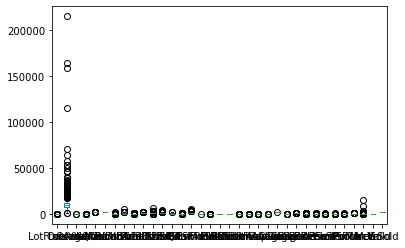

In [119]:
train_num.plot(kind='box')

In [120]:
def outlier_cap(x):
    x = x.clip(upper = x.quantile(0.95))
    x = x.clip(lower = x.quantile(0.05))
    return x

In [121]:
train_num = train_num.apply(lambda x:outlier_cap(x))

<AxesSubplot:>

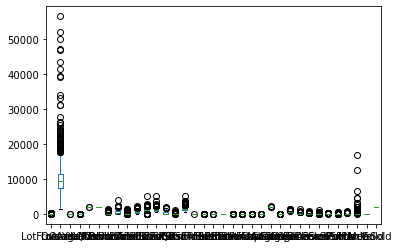

In [122]:
## For test data
test_num.plot(kind='box')

In [123]:
test_num = test_num.apply(lambda x:outlier_cap(x))

### Missing value treatment for categorical column 

In [124]:
train_cat.isnull().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [125]:
def missings_treat_cat(x):
    x = x.fillna(x.mode()[0])
    return x


In [126]:
train_cat = train_cat.apply(lambda x: missings_treat_cat(x))

In [127]:
test_cat = test_cat.apply(lambda x: missings_treat_cat(x))

### Dummy Variable creation

In [128]:
## For train
train_cat_Dummies = pd.get_dummies(train_cat, drop_first=True)

In [129]:
train_cat_Dummies.shape

(1460, 223)

In [130]:
train_y.shape

(1460,)

In [131]:
train_cleaned = pd.concat([train_num,train_cat_Dummies,train_y], axis = 1)

In [145]:
train_cleaned.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,65.0,8450.0,7,5,2003,2003,196.0,706,0.0,150,...,0,0,0,1,0,0,0,1,0,208500
1,80.0,9600.0,6,8,1976,1976,0.0,978,0.0,284,...,0,0,0,1,0,0,0,1,0,181500
2,68.0,11250.0,7,5,2001,2002,162.0,486,0.0,434,...,0,0,0,1,0,0,0,1,0,223500
3,60.0,9550.0,7,5,1916,1970,0.0,216,0.0,540,...,0,0,0,1,0,0,0,0,0,140000
4,84.0,14260.0,8,5,2000,2000,350.0,655,0.0,490,...,0,0,0,1,0,0,0,1,0,250000


In [134]:
## For test
test_cat_Dummies = pd.get_dummies(test_cat, drop_first=True)

In [135]:
test_cat_Dummies.shape

(1459, 206)

In [136]:
test_num.shape

(1459, 35)

In [143]:
test_cleaned = pd.concat([test_num,test_cat_Dummies], axis = 1)

In [144]:
test_cleaned.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622.0,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
1,81.0,14267.0,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
2,74.0,13830.0,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0
3,78.0,9978.0,6,6,1998,1998,20.0,602.0,0.0,324.0,...,0,0,0,0,1,0,0,0,1,0
4,43.0,5005.0,8,5,1992,1992,0.0,263.0,0.0,1017.0,...,0,0,0,0,1,0,0,0,1,0


### Assumptions 

In [149]:
import matplotlib
from matplotlib import pyplot
import seaborn as sns

%matplotlib inline

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

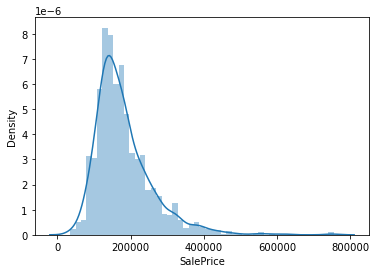

In [150]:
sns.distplot(train.SalePrice)

In [151]:
## Correlation between x and y variables
train_num.corrwith(train_cleaned.SalePrice)

LotFrontage      0.372647
LotArea          0.434327
OverallQual      0.747012
OverallCond     -0.115033
YearBuilt        0.537470
YearRemodAdd     0.504409
MasVnrArea       0.456347
BsmtFinSF1       0.371463
BsmtFinSF2      -0.045118
BsmtUnfSF        0.191118
TotalBsmtSF      0.626933
1stFlrSF         0.602109
2ndFlrSF         0.280962
LowQualFinSF          NaN
GrLivArea        0.696737
BsmtFullBath     0.230846
BsmtHalfBath    -0.015957
FullBath         0.522577
HalfBath         0.299111
BedroomAbvGr     0.215004
KitchenAbvGr          NaN
TotRmsAbvGrd     0.536888
Fireplaces       0.469543
GarageYrBlt      0.479227
GarageCars       0.646652
GarageArea       0.630198
WoodDeckSF       0.334923
OpenPorchSF      0.366878
EnclosedPorch   -0.153472
3SsnPorch             NaN
ScreenPorch      0.101139
PoolArea              NaN
MiscVal               NaN
MoSold           0.048552
YrSold          -0.028923
dtype: float64

In [153]:
## Correlation between x and x variables
corr_matrix = train_num.corr()

<AxesSubplot:>

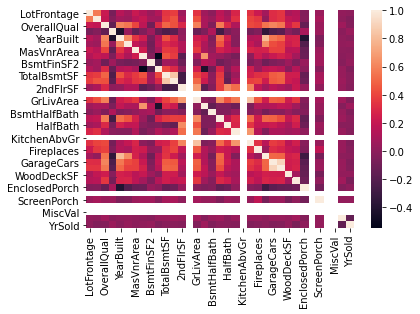

In [154]:
sns.heatmap(corr_matrix)

## Feature Selection


### RFE


In [158]:
features = train_cleaned[train_cleaned.columns.difference(['SalePrice'])]

In [160]:
target = train_cleaned['SalePrice']

In [164]:
from sklearn.feature_selection import RFE

In [165]:
### Initlalzing the RFE Model
rfe = RFE(LinearRegression(), n_features_to_select=15)

In [166]:
rfe = rfe.fit(features, target)

In [167]:
features.columns[rfe.get_support()]

Index(['ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'GarageCond_Gd',
       'GarageCond_TA', 'GarageQual_Po', 'PoolQC_Fa', 'PoolQC_Gd',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl'],
      dtype='object')

### Select K best 

In [168]:
from sklearn.feature_selection import SelectKBest, f_classif
SKB = SelectKBest(f_classif, k=15).fit(features, target )

features.columns[SKB.get_support()]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  2  47  56  67  83 146 164 190 221 242] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Index(['BsmtCond_Po', 'Condition2_PosN', 'Condition2_RRAn', 'ExterCond_Po',
       'Exterior1st_ImStucc', 'Exterior2nd_Other', 'GarageCars', 'GrLivArea',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'OverallQual',
       'SaleCondition_Alloca', 'SaleCondition_Partial', 'SaleType_Con',
       'SaleType_New'],
      dtype='object')

### VIF 

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [170]:
VIF = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [171]:
VIF = pd.Series(VIF, name='VIF')

In [172]:
cols = pd.Series(features.columns, name='Column_Name')

In [173]:
VIF_res = pd.concat([cols,VIF],axis=1)

In [174]:
VIF_10 = VIF_res.sort_values(by=['VIF']).head(10)

In [175]:
VIF_10

,Column_Name,VIF
40,Condition1_RRNe,1.177185
247,SaleType_Oth,1.205146
242,SaleType_Con,1.209942
102,Foundation_Wood,1.244475
158,LotConfig_FR3,1.246145
191,MoSold,1.254848
244,SaleType_ConLI,1.295571
241,SaleType_CWD,1.297072
249,ScreenPorch,1.308846
257,YrSold,1.336694


## Final list

In [262]:
final_imp_features = {'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'GarageCond_Gd',
       'GarageCond_TA', 'GarageQual_Po','PoolQC_Gd','RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl','BsmtCond_Po', 'Condition2_PosN','ExterCond_Po',
        'GarageCars', 'GrLivArea','Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'OverallQual',
       'SaleCondition_Alloca', 'SaleCondition_Partial',
       'SaleType_New'}

In [263]:
imp_features = list(final_imp_features)

In [264]:
train_final_X = train_cleaned[imp_features]

In [265]:
train_final_X.head()

,SaleCondition_Alloca,PoolQC_Gd,RoofMatl_WdShake,GarageCond_Gd,Neighborhood_NridgHt,ExterQual_TA,Neighborhood_NoRidge,ExterQual_Fa,SaleType_New,RoofMatl_Tar&Grv,...,GrLivArea,OverallQual,ExterQual_Gd,ExterCond_Po,SaleCondition_Partial,GarageQual_Po,GarageCars,GarageCond_TA,BsmtCond_Po,Condition2_PosN
0,0,1,0,0,0,0,0,0,0,0,...,1710.0,7,1,0,0,0,2,1,0,0
1,0,1,0,0,0,1,0,0,0,0,...,1262.0,6,0,0,0,0,2,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1786.0,7,1,0,0,0,2,1,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1717.0,7,0,0,0,0,3,1,0,0
4,0,1,0,0,0,0,1,0,0,0,...,2198.0,8,1,0,0,0,3,1,0,0


In [266]:
train_final_Y = train_cleaned.loc[:,['SalePrice']]

In [267]:
train_final = pd.concat([train_final_X,train_final_Y],axis=1)

In [268]:
train_final.head()

,SaleCondition_Alloca,PoolQC_Gd,RoofMatl_WdShake,GarageCond_Gd,Neighborhood_NridgHt,ExterQual_TA,Neighborhood_NoRidge,ExterQual_Fa,SaleType_New,RoofMatl_Tar&Grv,...,OverallQual,ExterQual_Gd,ExterCond_Po,SaleCondition_Partial,GarageQual_Po,GarageCars,GarageCond_TA,BsmtCond_Po,Condition2_PosN,SalePrice
0,0,1,0,0,0,0,0,0,0,0,...,7,1,0,0,0,2,1,0,0,208500
1,0,1,0,0,0,1,0,0,0,0,...,6,0,0,0,0,2,1,0,0,181500
2,0,1,0,0,0,0,0,0,0,0,...,7,1,0,0,0,2,1,0,0,223500
3,0,1,0,0,0,1,0,0,0,0,...,7,0,0,0,0,3,1,0,0,140000
4,0,1,0,0,0,0,1,0,0,0,...,8,1,0,0,0,3,1,0,0,250000


## Resampling of data

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
X_train,X_valid,y_train,y_valid  = train_test_split(train_final_X,train_final_Y, test_size=0.2, random_state=22)

## Random Forest 

In [271]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

pargrid_ada = {'n_estimators': [50, 60, 70, 80, 90, 100],
                'max_features': [2,3,4],
              'max_depth': [2,3,4,5,6]}
gscv_Rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)
gscv_Rf.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             verbose=True)

In [272]:
gscv_Rf.best_params_

{'max_depth': 6, 'max_features': 4, 'n_estimators': 80}

In [273]:
best_model = RandomForestRegressor(max_depth=6, max_features=4, n_estimators=80)
best_model.fit(X_train,y_train)

<ipython-input-273-53b0f29551f2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=6, max_features=4, n_estimators=80)

In [274]:
R2_train = round(metrics.r2_score(y_train ,best_model.predict(X_train)),4)
print('R2_train',R2_train)

R2_train 0.8215


In [275]:
R2_valid = round(metrics.r2_score(y_valid ,best_model.predict(X_valid)),4)
print('R2_valid',R2_valid)

R2_valid 0.8021


### RMSLE Evaluation 

In [276]:
from sklearn.metrics import mean_squared_log_error

In [277]:
np.sqrt(mean_squared_log_error(y_train, best_model.predict(X_train)))

0.1855242611565294

In [278]:
np.sqrt(mean_squared_log_error(y_valid, best_model.predict(X_valid)))

0.19444032742508205

##  Gradient Boost

In [279]:
from sklearn.ensemble import GradientBoostingRegressor

In [280]:
pargrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)],
              'max_features' : [2,3,4]}

In [281]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_gbm.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 7.39337994e-002  1.43213276e-001  2.61166069e-001  3.58944974e-001
  4.28784249e-001  9.12410195e-002  1.66489760e-001  2.99136655e-001
  3.98650377e-001  4.73685768e-001  9.73149743e-002  1.83865192e-001
  3.21576729e-001  4.25461100e-001  5.02253250e-001  4.84901097e-001
  6.47859215e-001  7.31532712e-001  7.46828816e-001  7.53950978e-001
  5.29000194e-001  6.83604496e-001  7.46306244e-001  7.54761705e-001
  7.58621472e-001  5.62838167e-001  7.04738433e-001  7.53909976e-001
  7.59634267e-001  7.63100107e-001  7.57825134e-001  7.52493136e-001
  7.52063473e-001  7.51590555e-001  7.38833790e-001  7.57576160e-001
  7.59992861e-001  7.42577629e-001  7.48141125e-001  7.38000786e-001
  7.59244278e-001  7.48227256e-001  7.46856828e-001  7.40411430e-001
  7.30129172e-001  6.99149828e-001  6.73039962e-001  6.72443279e-001
  6.44429520e-001  6.54808942e

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_features': [2, 3, 4],
                         'n_estimators': [100, 200, 400, 600, 800]},
             verbose=True)

In [282]:
gscv_gbm.best_params_

{'learning_rate': 0.01, 'max_features': 4, 'n_estimators': 800}

In [283]:
gbm=GradientBoostingRegressor(learning_rate = 0.01, max_features = 4, n_estimators=800)
gbm.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(learning_rate=0.01, max_features=4, n_estimators=800)

In [284]:
R2_train = round(metrics.r2_score(y_train ,gbm.predict(X_train)),4)
print('R2_train',R2_train)

R2_train 0.8451


In [285]:
R2_valid = round(metrics.r2_score(y_valid ,gbm.predict(X_valid)),4)
print('R2_valid',R2_valid)

R2_valid 0.8192


### RMSLE Evaluation 

In [286]:
np.sqrt(mean_squared_log_error(y_train, gbm.predict(X_train)))

0.16860572787239103

In [287]:
np.sqrt(mean_squared_log_error(y_valid, best_model.predict(X_valid)))

0.19444032742508205

# Since gradient boosting technique gives better score, we will use this for test data predictions. 

In [301]:
imp_features = {'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'GarageCond_Gd',
       'GarageCond_TA', 'GarageQual_Po','PoolQC_Gd','RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl','BsmtCond_Po', 'Condition2_PosN', 'ExterCond_Po',
        'GarageCars', 'GrLivArea','Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'OverallQual',
       'SaleCondition_Alloca', 'SaleCondition_Partial',
       'SaleType_New'}

In [302]:
imp_f = list(imp_features)

In [303]:
final_test = test_cleaned[imp_f]

In [304]:
Sale_price = gbm.predict(final_test)

In [305]:
Solution = pd.DataFrame(Sale_price)

In [307]:
Solution = Solution.rename({0:'SalePrice'}, axis=1)

In [309]:
Solution = pd.concat([id,Solution], axis=1)

In [310]:
Solution

,Id,SalePrice
0,1461,134576.537258
1,1462,152882.694339
2,1463,178128.885845
3,1464,187522.842412
4,1465,221058.877612
...,...,...
1454,2915,110095.063664
1455,2916,123179.169224
1456,2917,158533.411357
1457,2918,120084.528855


In [311]:
## Exporting to external csv file.
Solution.to_csv('solution_gradient_boost.csv')